In [18]:
     

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_skin = pd.read_csv('../Database/EWG/ewg_skin_products_transformed_8208.csv')
df_sun = pd.read_csv('../Database/EWG/ewg_sun_products_transformed_1565.csv')
df_makeup = pd.read_csv('../Database/EWG/ewg_makeup_products_transformed_10527.csv')

df_hair = pd.read_csv('../Database/EWG/ewg_hair_products_transformed_4908.csv')
df_or = pd.read_csv('../Database/EWG/ewg_oralcare_products_transformed_937.csv')
df_frag = pd.read_csv('../Database/EWG/ewg_fragrance_products_transformed_484.csv')

In [4]:
df_all = pd.concat([df_skin, df_sun, df_makeup, df_hair, df_or, df_frag])
df_all = df_all.drop_duplicates()
df_all.reset_index(drop=True, inplace=True)

In [5]:
df_all

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list
0,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701958-S...,Soap for Goodness Sake,"Handmade Soap, Olive Oil I",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Extra Virgin Olive Oil (Sod...,"['STEM WATER', 'CINNAMOMUM ZEYLANICUM LEAF OIL']"
1,Skin,Bar Soap,https://www.ewg.org/skindeep/products/604412-M...,Makes 3 Organics,Unscented Super Shea Soap Bar,verified,https://static.ewg.org/skindeep_images/6044/60...,"Safflower* and/or Sunflower* Oils, Coconut* Oi...","['SAFFLOWER FLOWER', 'COCONUT ACID', 'PALM) FR..."
2,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701974-S...,Soap for Goodness Sake,"Handmade Soap, Shea and Oats",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Sunflower Oil (Sodium Sunfl...,"['STEM WATER', 'BUTYROSPERMUM PARKII BUTTER', ..."
3,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701929-S...,Soap for Goodness Sake,"Handmade Soap, Balancing Act",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Sunflower Oil (Sodium Sunfl...,"['STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', ..."
4,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701942-S...,Soap for Goodness Sake,"Shampoo & Body Bar, French Lavender",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Expeller Pressed Babassu Oil (Orbig...,"['STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', ..."
...,...,...,...,...,...,...,...,...,...
23255,Fragrance,Fragrance For Women,https://www.ewg.org/skindeep/products/877613-C...,Calvin Klein,Euphoria Ladies Parfum Spray,10,https://static.ewg.org/skindeep/img/ewg_missin...,"ALCOHOL DENAT., PARFUM/FRAGRANCE, AQUA/WATER/E...","['ALCOHOL DENAT.', 'APAFLURANE', 'PROPYLENE GL..."
23256,Fragrance,Fragrance For Women,https://www.ewg.org/skindeep/products/916647-E...,Elizabeth Taylor,White Diamonds Eaude Toilette Spray,10,https://static.ewg.org/skindeep/img/ewg_missin...,ALCOHOL DENAT.. PARFUM/FRAGRANCE. WATER/AQUA/E...,"['BUTYLPHENYL METHYLPROPIONAL', 'BENZYL SALICY..."
23257,Fragrance,Fragrance For Women,https://www.ewg.org/skindeep/products/886825-D...,Donna Karan,Liquid Cashmere Blush Eau De Parfum Spray,10,https://static.ewg.org/skindeep_images/8868/88...,"ALCOHOL DENAT., WATERAQUAEAU, FRAGRANCE (PARFU...","['ALCOHOL DENAT.', 'BENZYL SALICYLATE', 'BUTYL..."
23258,Fragrance,Fragrance For Women,https://www.ewg.org/skindeep/products/875404-V...,Victoria's Secret,Love Eau De Parfum,10,https://static.ewg.org/skindeep_images/8754/87...,"ALCOHOL DENAT., WATER (AQUA, EAU), FRAGRANCE (...","['ALCOHOL DENAT.', 'MARIS AQUA', 'LEAF)', 'ETH..."


In [10]:
df_all['new_ing_list_new'] = df_all['new_ing_list'].apply(', '.join)
df_all.head()

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list,new_product_score,new_ing_list_new
0,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701958-S...,Soap for Goodness Sake,"Handmade Soap, Olive Oil I",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Extra Virgin Olive Oil (Sod...,"['STEM WATER', 'CINNAMOMUM ZEYLANICUM LEAF OIL']",1,"[, ', S, T, E, M, , W, A, T, E, R, ', ,, , '..."
1,Skin,Bar Soap,https://www.ewg.org/skindeep/products/604412-M...,Makes 3 Organics,Unscented Super Shea Soap Bar,verified,https://static.ewg.org/skindeep_images/6044/60...,"Safflower* and/or Sunflower* Oils, Coconut* Oi...","['SAFFLOWER FLOWER', 'COCONUT ACID', 'PALM) FR...",1,"[, ', S, A, F, F, L, O, W, E, R, , F, L, O, W..."
2,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701974-S...,Soap for Goodness Sake,"Handmade Soap, Shea and Oats",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Sunflower Oil (Sodium Sunfl...,"['STEM WATER', 'BUTYROSPERMUM PARKII BUTTER', ...",1,"[, ', S, T, E, M, , W, A, T, E, R, ', ,, , '..."
3,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701929-S...,Soap for Goodness Sake,"Handmade Soap, Balancing Act",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Organic Sunflower Oil (Sodium Sunfl...,"['STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', ...",1,"[, ', S, T, E, M, , W, A, T, E, R, ', ,, , '..."
4,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701942-S...,Soap for Goodness Sake,"Shampoo & Body Bar, French Lavender",verified,https://static.ewg.org/skindeep_images/7019/70...,Saponified Expeller Pressed Babassu Oil (Orbig...,"['STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', ...",1,"[, ', S, T, E, M, , W, A, T, E, R, ', ,, , '..."


In [7]:
df_all['new_product_score'] = df_all['product_score'].map({'verified': 1,
                                                          '01': 2,
                                                          '02': 3,
                                                          '03': 4,
                                                          '04': 5,
                                                          '05': 6,
                                                          '06': 7,
                                                          '07': 8,
                                                          '08': 9,
                                                          '09': 10,
                                                          '10': 10,})

In [11]:
tfidf = TfidfVectorizer(binary = True, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_all['ingredient_list']).toarray()
labels = df_all['new_product_score']
features.shape

(23260, 27041)

In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 6
for score in df_all['new_product_score'].iteritems():
  features_chi2 = chi2(features, labels == score)
  indices = np.argsort(features_chi2[1])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(score))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[:N])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[:N])))

# '(0, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(1, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(2, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(3, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(4, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
.

# '(40, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(41, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(42, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(43, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryzanol
. oil oryza
. oil ormenis
# '(44, 1)':
  . Most correlated unigrams:
. 00
. olive
. oleth
. olerecea
. oleracea
. oleoyl
  . Most correlated bigrams:
. oil palm
. oil paeonia
. oil ozokerite
. oil oryza

KeyboardInterrupt: 

In [14]:
X, y = df_all.ingredient_list, df_all.new_product_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
tfidf = TfidfVectorizer(binary = True, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

In [27]:
forest_clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=200, class_weight='balanced')
forest_clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=200, n_estimators=200)

In [28]:
# Predict on training set
train_predict = forest_clf.predict(X_train_tfidf)
print('Accuracy:', accuracy_score(y_train, train_predict))

Accuracy: 0.9953245915735167


In [29]:
# Predict on test set
test_predict = forest_clf.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, test_predict))

Accuracy: 0.7646173688736028


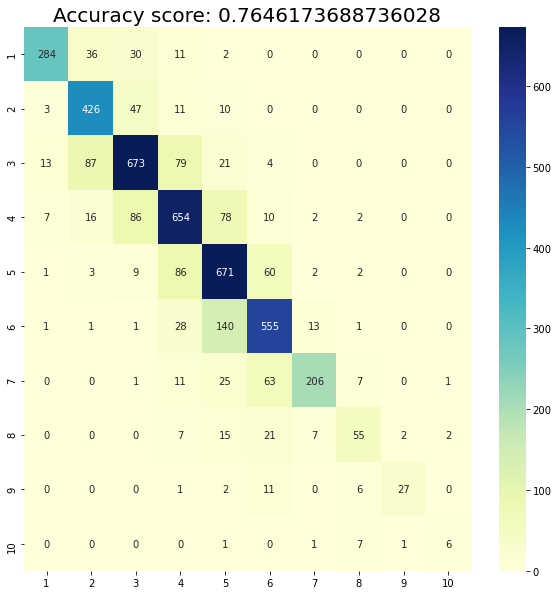

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, test_predict), cmap="YlGnBu", annot=True, fmt="d",
           xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           yticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title(f'Accuracy score: {accuracy_score(y_test, test_predict)}', fontsize=20)
plt.show()

## **Linear**

In [23]:
linear_reg = LinearRegression(normalize=True)

In [24]:
linear_reg.fit(X_train_tfidf, y_train)

LinearRegression(normalize=True)

In [25]:
y_pred = linear_reg.predict(X_test_tfidf)

In [26]:
print('Coefficients: \n', linear_reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.39148007  2.86579585 10.41201105 ... -4.4297657   6.28014213
  6.28014213]
Mean squared error: 4.41
Coefficient of determination: -0.28


In [ ]:
# X, y = df.ingredients, df.cuisine_id
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
# tfidf = TfidfVectorizer(binary = True, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.transform(X_test)

# models = [
#     RandomForestClassifier(n_estimators=100, max_features=0.5, min_samples_leaf= 2, n_jobs=-1, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index = range(CV*len(models)))
# entries = []
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring = 'accuracy', cv = CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()